<a href="https://colab.research.google.com/github/2303A52243/STML-ASSIGMENTS/blob/main/STML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


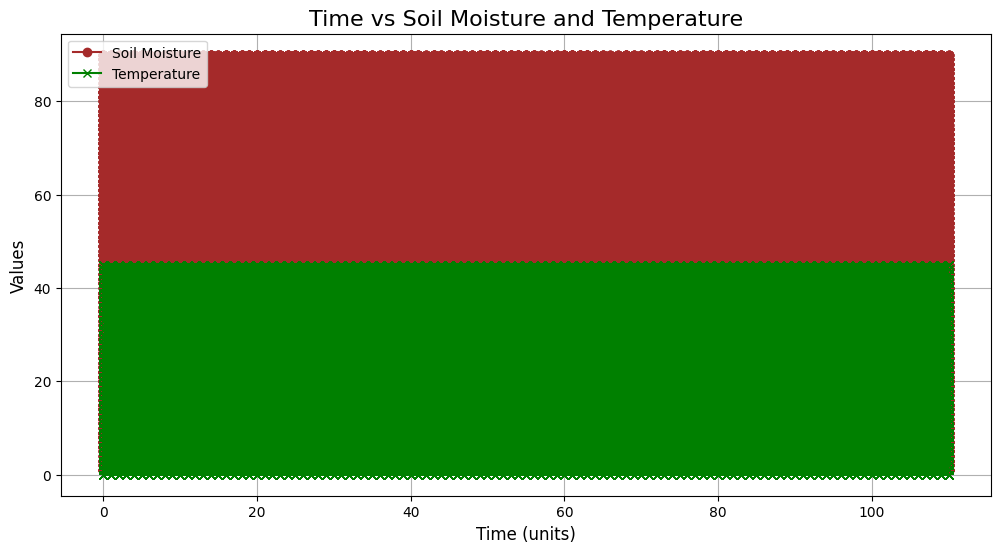

In [ ]:
#VDM
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/TARP.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Soil Moisture'], label='Soil Moisture', color='brown', marker='o')
plt.plot(df['Time'], df['Temperature'], label='Temperature', color='green', marker='x')

plt.title('Time vs Soil Moisture and Temperature', fontsize=16)
plt.xlabel('Time (units)', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid()

plt.show()


The kurtosis of 'Soil Moisture' is: -1.2003


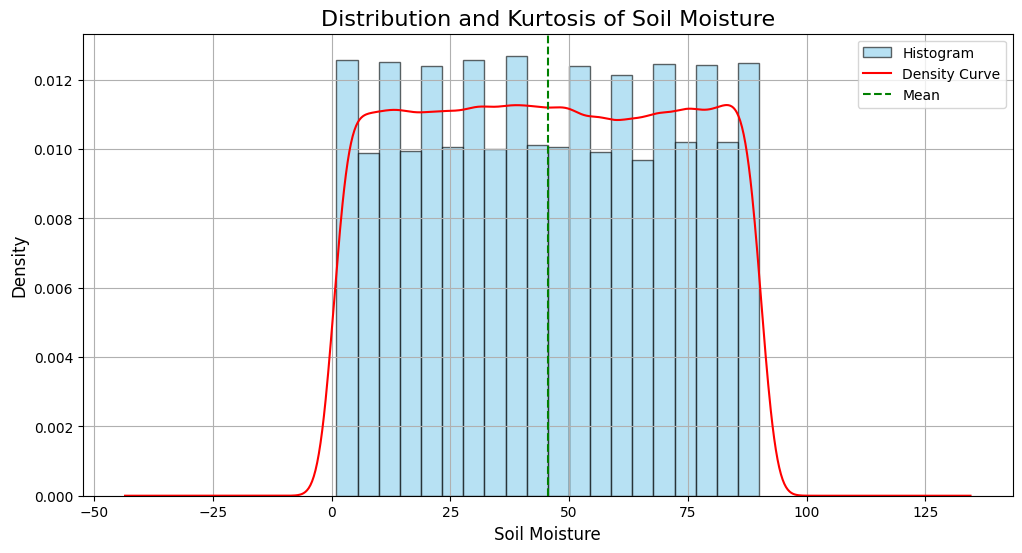

In [ ]:
#KURTOSIS
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

file_path = "TARP.csv"
df = pd.read_csv(file_path)

column_to_analyze = 'Soil Moisture'

kurtosis_value = kurtosis(df[column_to_analyze], fisher=True)
print(f"The kurtosis of '{column_to_analyze}' is: {kurtosis_value:.4f}")

plt.figure(figsize=(12, 6))
plt.hist(df[column_to_analyze], bins=20, alpha=0.6, color='skyblue', edgecolor='black', density=True, label='Histogram')
df[column_to_analyze].plot(kind='kde', color='red', label='Density Curve')

plt.title(f'Distribution and Kurtosis of {column_to_analyze}', fontsize=16)
plt.xlabel(column_to_analyze, fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.axvline(df[column_to_analyze].mean(), color='green', linestyle='dashed', linewidth=1.5, label='Mean')
plt.legend()
plt.grid()

plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


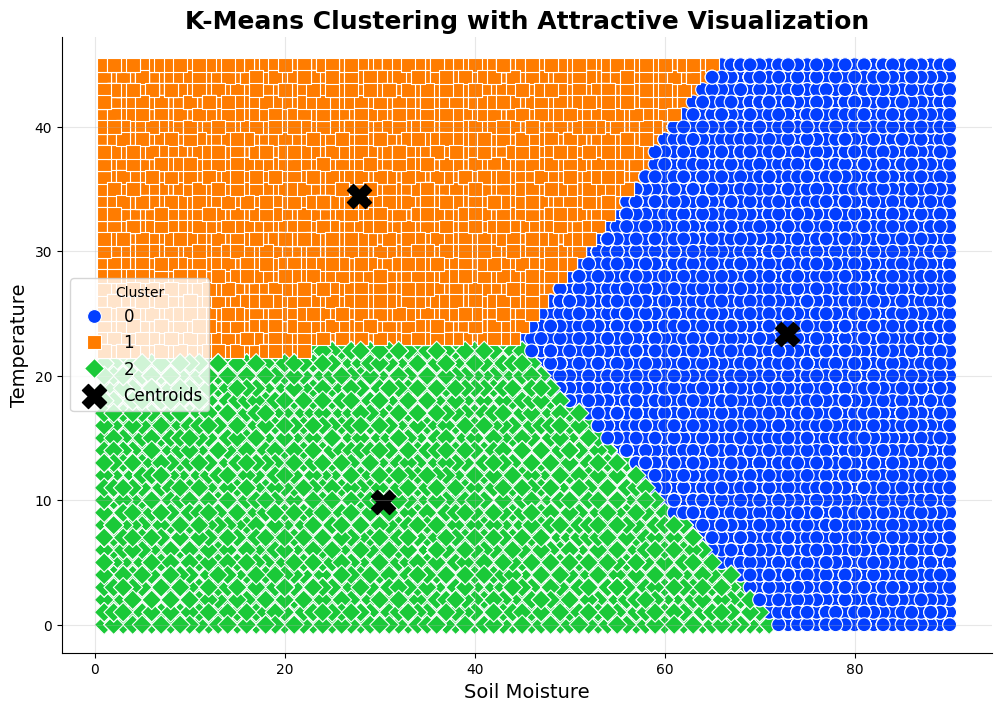

In [ ]:
# K-MEAN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


file_path = "TARP.csv"
df = pd.read_csv(file_path)

features = ['Soil Moisture', 'Temperature']
data = df[features]


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters as needed
df['Cluster'] = kmeans.fit_predict(data_scaled)


palette = sns.color_palette("bright", n_colors=kmeans.n_clusters)


plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df[features[0]],
    y=df[features[1]],
    hue=df['Cluster'],
    palette=palette,
    style=df['Cluster'],
    markers=["o", "s", "D"],
    s=100
)


centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title('K-Means Clustering with Attractive Visualization', fontsize=18, fontweight='bold')
plt.xlabel(features[0], fontsize=14)
plt.ylabel(features[1], fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.grid(alpha=0.3)
sns.despine()

plt.show()


Accuracy: 0.7092

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.69      9305
           1       0.74      0.71      0.72     10695

    accuracy                           0.71     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.71      0.71      0.71     20000



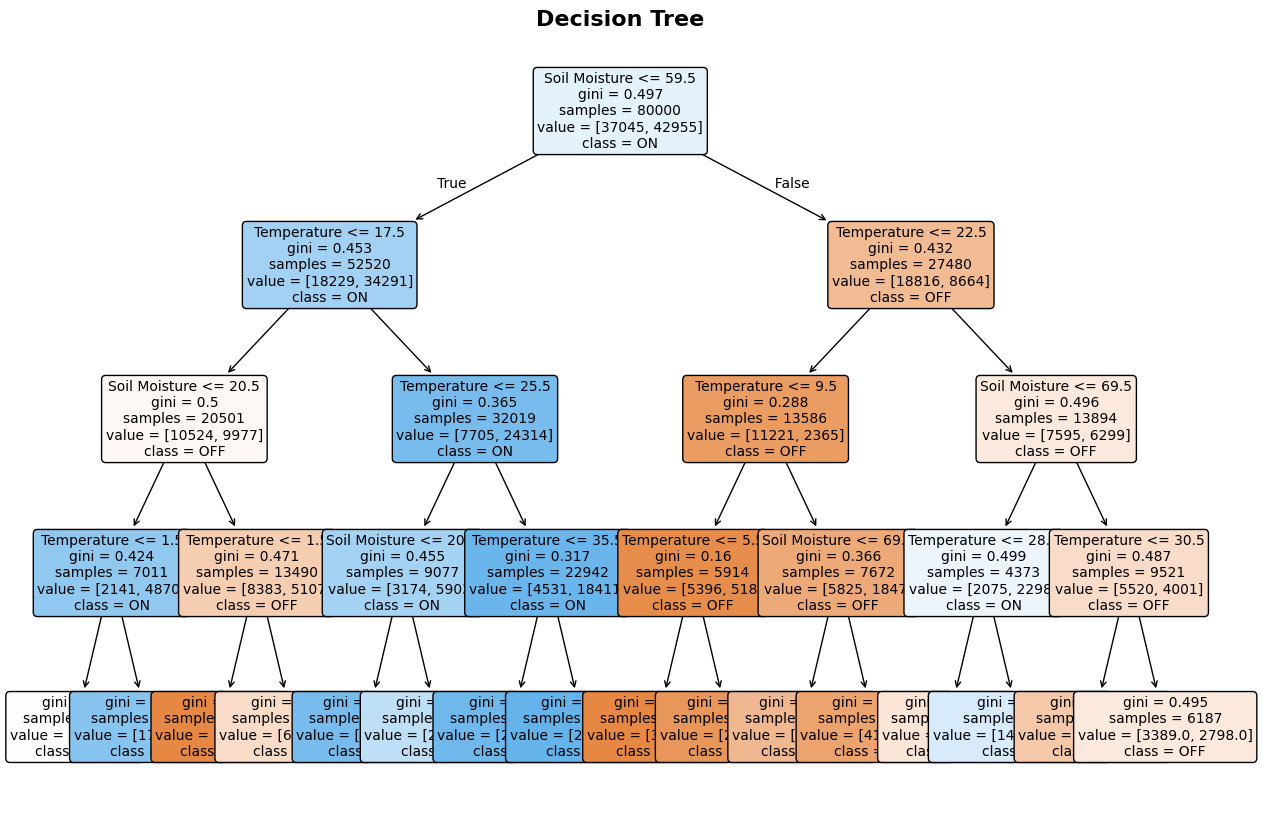

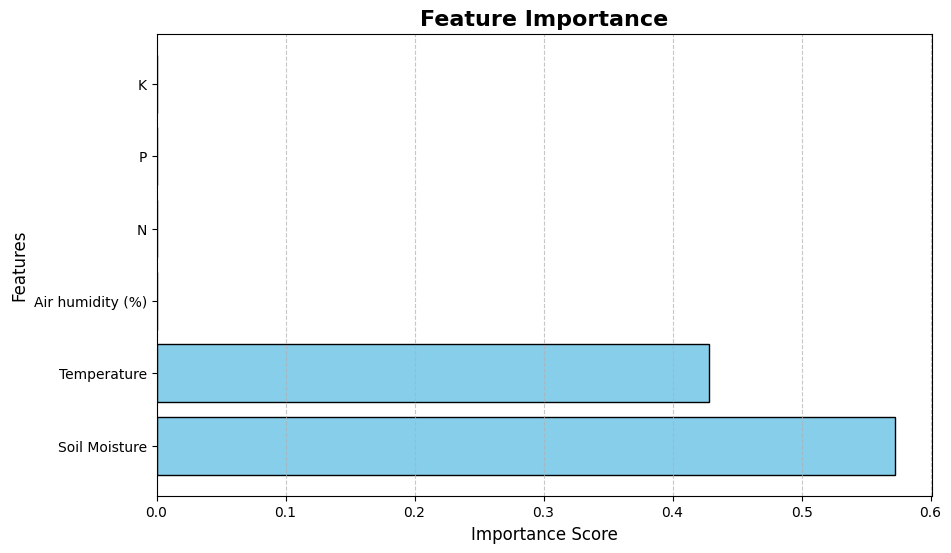

In [ ]:
#DECISION TREE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

file_path = "/content/TARP.csv"
df = pd.read_csv(file_path)

if df['Status'].dtype == 'object':
    label_encoder = LabelEncoder()
    df['Status'] = label_encoder.fit_transform(df['Status'])  # Encode "ON"/"OFF" as 1/0

features = ['Soil Moisture', 'Temperature', 'Air humidity (%)', 'N', 'P', 'K']
target = 'Status'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)  # Limit depth for better visualization
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(15, 10))
plot_tree(
    tree_clf,
    feature_names=features,
    class_names=label_encoder.classes_ if 'label_encoder' in locals() else ['0', '1'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree", fontsize=16, fontweight='bold')
plt.show()

importances = tree_clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue', edgecolor='black')
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Accuracy: 0.66485

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63      9305
           1       0.68      0.70      0.69     10695

    accuracy                           0.66     20000
   macro avg       0.66      0.66      0.66     20000
weighted avg       0.66      0.66      0.66     20000



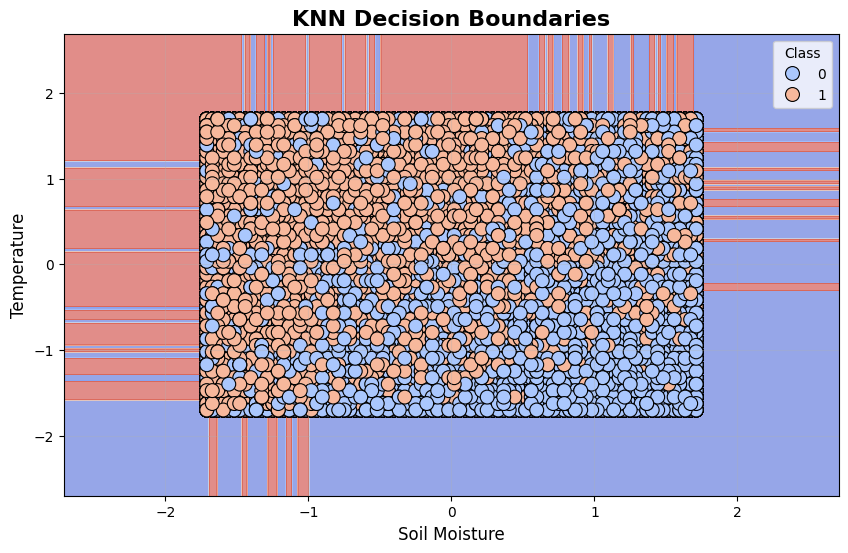

In [ ]:
# KNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

file_path = "/content/TARP.csv"
df = pd.read_csv(file_path)

if df['Status'].dtype == 'object':
    label_encoder = LabelEncoder()
    df['Status'] = label_encoder.fit_transform(df['Status'])  # Encode "ON"/"OFF" as 1/0

features = ['Soil Moisture', 'Temperature']
target = 'Status'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundaries(X, y, model, features):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.6, cmap='coolwarm')
    sns.scatterplot(
        x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k', s=100
    )
    plt.title("KNN Decision Boundaries", fontsize=16, fontweight="bold")
    plt.xlabel(features[0], fontsize=12)
    plt.ylabel(features[1], fontsize=12)
    plt.grid(alpha=0.3)
    plt.legend(title="Class")
    plt.show()

plot_decision_boundaries(X_train_scaled, y_train, knn, features)


Accuracy: 0.68595

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.65      9305
           1       0.70      0.73      0.71     10695

    accuracy                           0.69     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.69      0.69      0.69     20000



<ipython-input-10-90c493239cf9>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


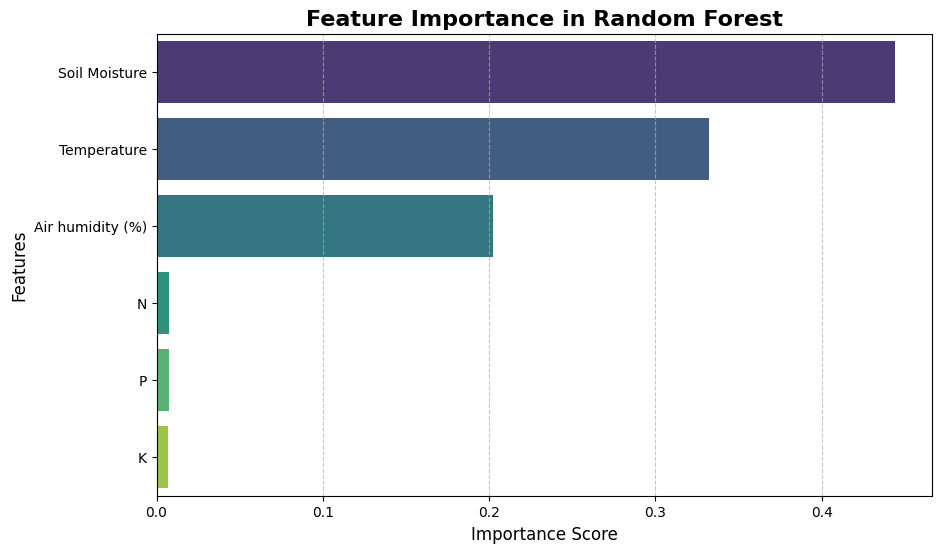

In [ ]:
# RANDOM FOREST
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

file_path = "/content/TARP.csv"
df = pd.read_csv(file_path)

if df['Status'].dtype == 'object':
    label_encoder = LabelEncoder()
    df['Status'] = label_encoder.fit_transform(df['Status'])  # Encode "ON"/"OFF" as 1/0

features = ['Soil Moisture', 'Temperature', 'Air humidity (%)', 'N', 'P', 'K']
target = 'Status'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

importances = rf_clf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title('Feature Importance in Random Forest', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


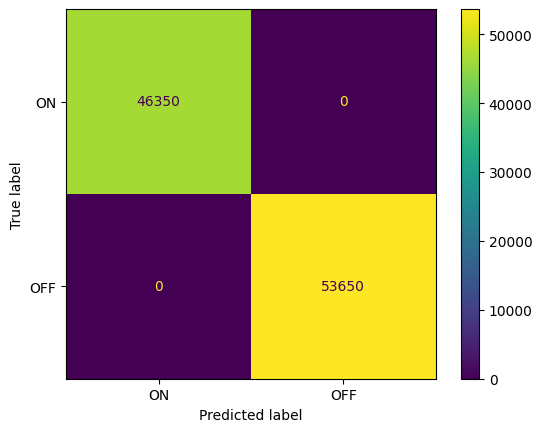

In [ ]:
#CONFUSION MATRIX
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

file_path = '/content/TARP.csv'
data = pd.read_csv(file_path)

actual_column = 'Status'

if 'Predicted_Status' not in data.columns:
    data['Predicted_Status'] = data[actual_column]

predicted_column = 'Predicted_Status'

actual = data[actual_column]
predicted = data[predicted_column]

cm = confusion_matrix(actual, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=actual.unique())
disp.plot(cmap='viridis')
